# Boston Airbnb Dataset

[Kaggle Link](https://www.kaggle.com/airbnb/boston)

Outline

- Initial look at the data - listings.csv
    - Identify columns with missing values
    - Identify columns to drop that suggest potential colinearity or are not useful, i.e id columns, urls, one value
    - 
- Initial look at the data - calendar.csv
    - Missing values
    - Remove unnecessary columns
- Merge listings and calendar datasets

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re

calendar = pd.read_csv('data/boston/calendar.csv')
listings = pd.read_csv('data/boston/listings.csv')

# Show maximum 500 columns when displaying dataframes
pd.set_option('display.max_columns', 500)

# Use Seaborn standard design palette for plots
sns.set()


datasets = [calendar, listings]
for dataset in datasets:
    display(dataset.sample(3))

,listing_id,date,available,price
1193328,4607307,2017-02-25,f,NaN
988360,12618291,2016-11-04,t,$350.00
214885,13813380,2016-11-04,f,NaN


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1448,13015353,https://www.airbnb.com/rooms/13015353,20160906204935,2016-09-07,"Marlborough St, steps to Newbury St","Located in the Back Bay, Just steps to Boylsto...",NaN,"Located in the Back Bay, Just steps to Boylsto...",none,NaN,NaN,NaN,NaN,NaN,NaN,https://a2.muscache.com/im/pictures/791fca1c-2...,https://a2.muscache.com/im/pictures/791fca1c-2...,https://a2.muscache.com/im/pictures/791fca1c-2...,https://a2.muscache.com/im/pictures/791fca1c-2...,62106939,https://www.airbnb.com/users/show/62106939,Attuck,2016-03-08,"Boston, Massachusetts, United States",NaN,within a few hours,100%,88%,f,https://a2.muscache.com/im/pictures/d7a0ffbe-0...,https://a2.muscache.com/im/pictures/d7a0ffbe-0...,Back Bay,3,3,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"Marlborough Street, Boston, MA 02115, United S...",Back Bay,Back Bay,NaN,Boston,MA,02115,Boston,"Boston, MA",US,United States,42.351681,-71.087064,t,Condominium,Entire home/apt,3,1.5,1.0,1.0,Real Bed,"{TV,""Air Conditioning"",Kitchen,Heating,Washer,...",NaN,$350.00,NaN,NaN,$500.00,$100.00,1,$0.00,1,1125,2 weeks ago,NaN,24,54,84,359,2016-09-06,2,2016-08-07,2016-08-10,80.0,10.0,7.0,10.0,9.0,9.0,9.0,f,NaN,NaN,f,flexible,f,f,1,1.87
2678,14692682,https://www.airbnb.com/rooms/14692682,20160906204935,2016-09-07,Spacious West Roxbury House,My place is located in a quiet location in Wes...,NaN,My place is located in a quiet location in Wes...,none,Quiet and nice,I sleep in downstairs bedroom so upstairs to g...,There is subway station about 15 min drive awa...,"Their rooms and common soaces (i.e. Kitchen, b...","Not often, unless needed.",- No access to first floor bedroom. - Please c...,https://a2.muscache.com/im/pictures/d6f132fc-b...,https://a2.muscache.com/im/pictures/d6f132fc-b...,https://a2.muscache.com/im/pictures/d6f132fc-b...,https://a2.muscache.com/im/pictures/d6f132fc-b...,19520294,https://www.airbnb.com/users/show/19520294,Peter,2014-08-05,"Boston, Massachusetts, United States",I work for the City of Boston. In University ...,within a few hours,100%,100%,f,https://a2.muscache.com/im/pictures/ed70d40a-7...,https://a2.muscache.com/im/pictures/ed70d40a-7...,West Roxbury,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Alleyne Street, Boston, MA 02132, United States",West Roxbury,West Roxbury,NaN,Boston,MA,02132,Boston,"Boston, MA",US,United States,42.271908,-71.147806,t,House,Private room,4,1.5,1.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$100.00,NaN,NaN,$300.00,$5.00,2,$10.00,1,1125,today,NaN,11,22,52,52,2016-09-06,1,2016-08-27,2016-08-27,100

## Plotting the listings on a map

In [2]:
BBox = (
    listings.longitude.min(), listings.longitude.max(),
    listings.latitude.min(), listings.latitude.max()
)

print(BBox)

boston_map = plt.imread('map.png')

neighbourhoods = listings.neighbourhood_cleansed.unique()
colours = ['#2F4F4F', '#708090', '#7CFC00', '#CD5C5C', '#F5DEB3', '#98FB98',
           '#A52A2A', '#FFEFD5', '#87CEFA', '#FDF5E6', '#FFFACD', '#BDB76B',
           '#FFF8DC', '#FF00FF', '#7FFF00', '#008B8B', '#B22222', '#F4A460',
           '#00FFFF', '#778899', '#FFFFF0', '#DCDCDC', '#F5F5F5', '#3CB371',
           '#D8BFD8']

colours_zip = dict(zip(neighbourhoods, colours))

(-71.17178882136898, -71.00009991969033, 42.235941807706816, 42.38998167884297)


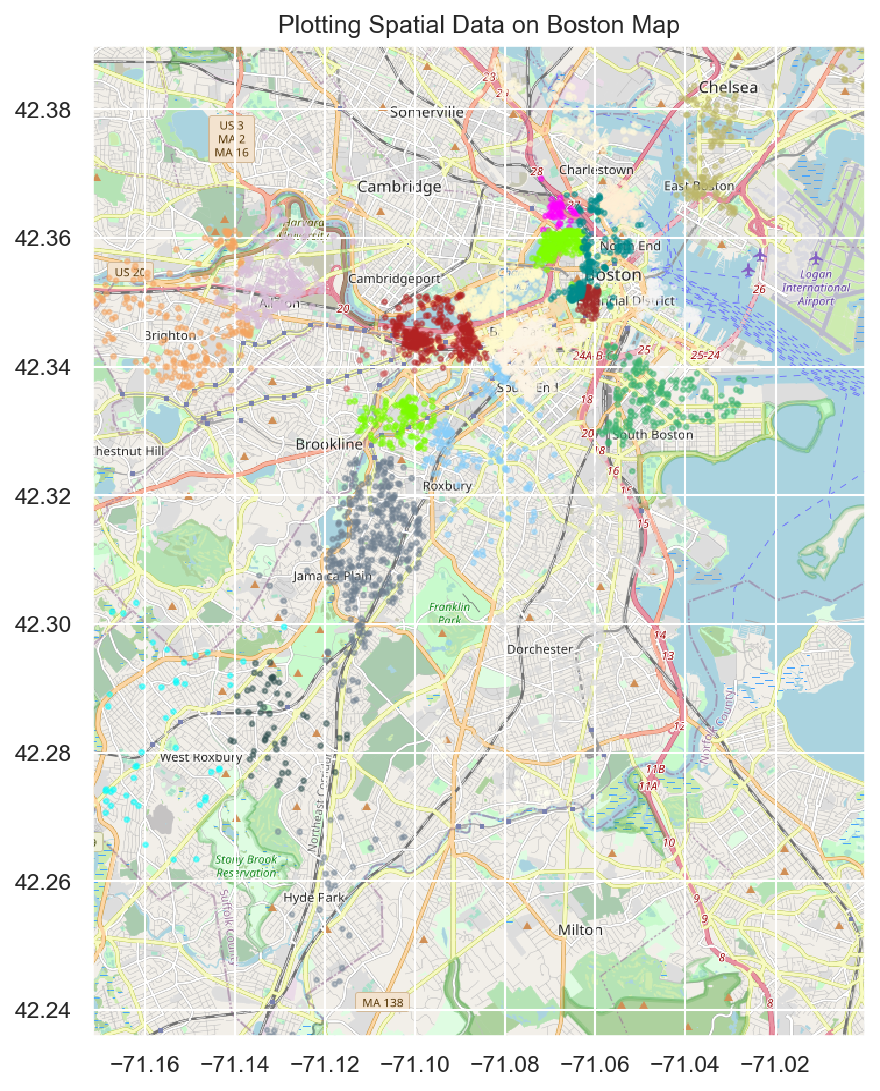

In [3]:
fig, ax = plt.subplots(figsize=(6.65, 8.75), dpi=150)
ax.scatter(listings.longitude, listings.latitude, zorder=1, alpha= 0.5,
           c=listings.neighbourhood_cleansed.apply(lambda x: colours_zip[x]), s=5)
ax.set_title('Plotting Spatial Data on Boston Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(boston_map, zorder=0, extent = BBox, aspect='auto');

## Initial look at the data - listings.csv

In [4]:
print(f'The dataset contains {len(listings.id.unique())} from {len(listings.host_id.unique())} hosts.')

The dataset contains 3585 from 2181 hosts.


From the missingno matrix we see that we have a few features with only null values and some with mostly null values. We'll drop these along with any columns containing only one unique value and columns containing IDs or URL links.

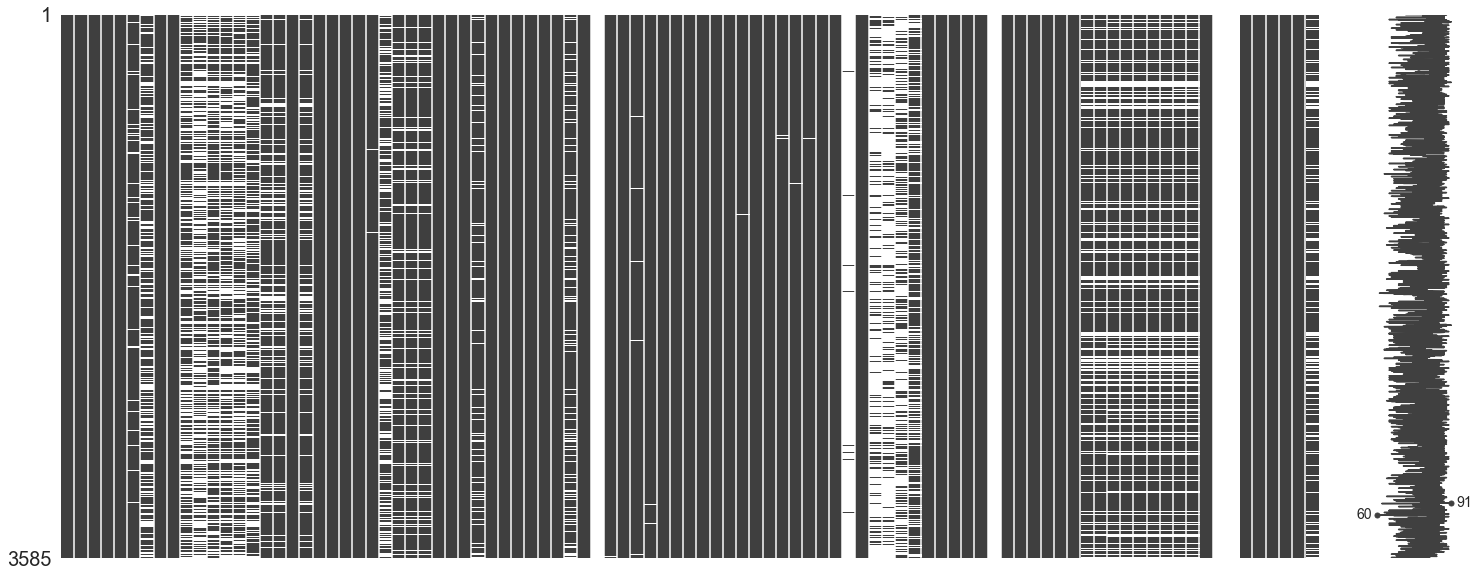

In [5]:
msno.matrix(listings);

In [6]:
# Note number of columns
before = len(listings.columns)

# Drop columns with all null values
all_null = len(listings.columns[listings.isnull().mean() == 1])
listings = listings.dropna(how='all', axis=1)

# Drop columns with more than 50% null values
more_than_50_null = listings.columns[listings.isnull().mean() > 0.5]
listings = listings.drop(more_than_50_null, axis=1)

# Drop columns with only one value
one_value_columns = [column for column in listings.columns if len(listings[column].unique()) == 1]
listings.drop(one_value_columns, axis=1, inplace=True)

# Drop url, ID (except for 'id') and name columns
url_id_columns = listings.columns[listings.columns.str.contains('url|_id|name')]
listings = listings.drop(url_id_columns, axis=1)

print(
    '{} columns dropped:\
    \n\t{} columns with only null values\
    \n\t{} columns with more than 50% null values\
    \n\t{} columns with only one unique value\
    \n\t{} URL/ID/name columns'.format(
        before - len(listings.columns),
        all_null,
        len(more_than_50_null),
        len(one_value_columns),
        len(url_id_columns)
    )
)

29 columns dropped:    
	4 columns with only null values    
	5 columns with more than 50% null values    
	8 columns with only one unique value    
	12 URL/ID/name columns


Now we will drop a bunch of features for many different reasons:
- they're covered by other features
- they are likely to add variance to the model by being colinear to our target variable
- they are almost completely one value

In [7]:
to_drop = [
    'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
    'host_verifications', 'host_has_profile_pic', 'street', 'neighbourhood',
    'city', 'zipcode', 'market', 'smart_location', 'latitude', 'longitude',
    'is_location_exact', 'cleaning_fee', 'guests_included', 'extra_people',
    'minimum_nights', 'maximum_nights', 'calendar_updated', 'availability_30',
    'bed_type', 'availability_60', 'availability_365', 'first_review',
    'last_review', 'require_guest_profile_picture', 
    'require_guest_phone_verification'
]

listings = listings.drop(to_drop, axis=1)

We are now going to convert text features to numerical ones.

- Summary and description features will be converted to a character count to see if a longer description helps.
- We will create a boolean local feature based on whether the host is from Boston or not
- `host_since` will be converted to a timedelta between an individual host's sign up date and the most recent host sign up
- `host_response_time` will be converted to a dummy variable
- % and $ signs will be stripped
- `amenities` column will be converted to a count of amenities listed
- Convert t/f features to 1 or 0

In [8]:
# Define description features
description_features = ['summary', 'space', 'description', 'neighborhood_overview', 'transit', 'access', 'interaction', 'house_rules', 'host_about']

# Convert null values to empty strings
listings[description_features] = listings[description_features].apply(lambda col: col.fillna(''), axis=1)

# Convert description features to character counts
for column in listings[description_features]:
    listings[column] = listings[column].apply(lambda x: len(x))

# Convert host_since to datetime and create host_since_days timedelta feature
listings.host_since = pd.to_datetime(listings.host_since, yearfirst=True)
listings['host_since_days'] = (listings.host_since - listings.host_since.min()).dt.days

# Create is_local feature based on host_location
local_destination = 'Boston, Massachusetts, United States'
listings['is_local'] = listings.host_location.apply(
    lambda location: 1 if location==local_destination else 0
)

# Drop converted features
listings = listings.drop(['host_since', 'host_location'], axis=1)

# Map host_response_time values to numerical values
response_map = {
    np.nan: 0,
    'a few days or more': 1,
    'within a day': 2,
    'within a few hours': 3,
    'within an hour': 4
}
listings.host_response_time = listings.host_response_time.replace(response_map)

# Remove ['$', ',', '%'] and convert to float
str_to_float_columns = ['host_response_rate', 'host_acceptance_rate', 'price']
for column in str_to_float_columns:
#     listings[column] = listings[column].str.replace('$', '').str.replace('%', '').str.replace(',', '').astype(float)
    listings[column] = listings[column].apply(lambda value: re.sub(r'\$|,|%', '', str(value))).astype(float)
    
# Convert boolean t/f columns to 1/0 columns
boolean_columns = ['host_is_superhost', 'instant_bookable']
for column in boolean_columns:
    listings[column] = listings[column].apply(lambda val: 1 if val=='t' else 0)
    
# Convert amenities to amenities_count
listings['amenities_count'] = listings.amenities.str.count(',')+1
listings = listings.drop('amenities', axis=1)

In [9]:
listings.sample(5)

,id,summary,space,description,neighborhood_overview,transit,access,interaction,house_rules,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,availability_90,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month,host_since_days,is_local,amenities_count
1307,6552654,229,1000,1000,977,140,0,292,26,304,4,100.0,99.0,0,Back Bay,Apartment,Entire home/apt,2,1.0,1.0,1.0,180.0,43,85,97.0,9.0,10.0,10.0,10.0,10.0,9.0,0,moderate,4,6.00,2114,1,23
130,4405982,155,960,1000,451,127,236,70,502,0,4,100.0,93.0,1,Jamaica Plain,Apartment,Entire home/apt,8,2.0,4.0,4.0,399.0,43,18,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict,2,0.80,2141,1,19
1016,4742275,246,251,1000,381,217,96,208,257,871,4,100.0,50.0,0,South End,Apartment,Entire home/apt,2,1.0,0.0,1.0,120.0,37,6,97.0,9.0,9.0,10.0,10.0,10.0,9.0,0,strict,3,0.39,1585,1,14
906,13797162,295,438,1000,681,332,188,177,75,218,4,100.0,100.0,0,Roxbury,Apartment,Entire home/apt,2,1.0,1.0,1.0,150.0,33,6,97.0,10.0,10.0,10.0,10.0,9.0,10.0,0,moderate,1,3.91,630,1,19
444,3659917,250,1000,1000,367,455,297,267,811,788,0,NaN,NaN,1,Mission Hill,Apartment,Private room,1,1.0,1.0,1.0,75.0,0,42,95.0,9.0,10.0,10.0,10.0,9.0,9.0,0,strict,1,1.63,1501,1,25


We are left with only a few objects with the rest being numerical features.

## Initial look at the data - calendar.csv

First off, with `price` as our target variable, we will drop any rows where the price is null. A quick glance at the data shows that this value is null when the listing is not availble for a given date.

Therefore we drop rows where price is null and drop the `available` column as this then contains only one value.

In [10]:
calendar.sample(2)

,listing_id,date,available,price
382968,11771810,2017-06-14,t,$250.00
846246,7869497,2017-03-02,f,NaN


In [11]:
# Drop any rows without the predictor value
calendar.dropna(subset=['price'], inplace=True)

# Convert price into a float
calendar.price = calendar.price.apply(
    lambda value: re.sub(r'\$|,', '', value)
).astype(float)

# Extract year and month from date string
calendar['year'] = calendar.date.apply(lambda value: value.split('-')[0]).astype(int)
calendar['month'] = calendar.date.apply(lambda value: value.split('-')[1]).astype(int)

# Drop available and date columns
calendar = calendar.drop(['available', 'date'], axis=1)

calendar.sample(2)

,listing_id,price,year,month
645418,13830152,65.0,2017,3
1162227,3792147,119.0,2017,4


## Merge datasets

In [169]:
df = pd.merge(
    listings, calendar, how='left',
    left_on='id', right_on='listing_id',
)

We will drop the price in the original listings dataset and keep the one from the calendar dataset which is time sensitive.

We'll also drop the 0.1% of rows without a price value and the remaining id rows that we used for the merge.

In [170]:
df = df.drop(['price_x', 'listing_id' ], axis=1)
df = df.rename({'price_y': 'price'}, axis=1)
df = df.dropna(subset=['price'])

df.sample(5)

,id,summary,space,description,neighborhood_overview,transit,access,interaction,house_rules,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,availability_90,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month,host_since_days,is_local,amenities_count,price,year,month
193227,4364989,245,1000,1000,0,473,168,93,0,0,3,100.0,75.0,0,South End,Apartment,Entire home/apt,4,1.0,1.0,2.0,16,31,95.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict,6,1.88,1811,1,13,175.0,2017.0,5.0
640267,14871445,71,0,71,0,0,0,0,0,0,4,100.0,100.0,0,Brighton,Apartment,Private room,2,1.5,1.0,1.0,82,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,1,NaN,2382,1,11,75.0,2016.0,11.0
160217,14855404,297,74,738,83,57,93,96,56,298,3,85.0,79.0,0,Roxbury,Apartment,Private room,1,1.0,1.0,1.0,70,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,1,NaN,2547,1,11,20.0,2017.0,3.0
238577,9144588,250,101,909,203,125,11,59,131,708,4,100.0,100.0,1,Back Bay,Apartment,Entire home/apt,2,1.0,0.0,1.0,38,43,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict,2,4.33,2542,1,20,210.0,2016.0,12.0
198823,989163,93,1000,1000,0,988,0,0,611,951,4,100.0,100.0,1,South End,Apartment,Entire home/apt,2,1.0,1.0,1.0,43,19,98.0,10.0,10.0,10.0,10.0,10.0,9.0,0,strict,4,0.52,1582,0,23,170.0,2017.0,6.0


## EDA


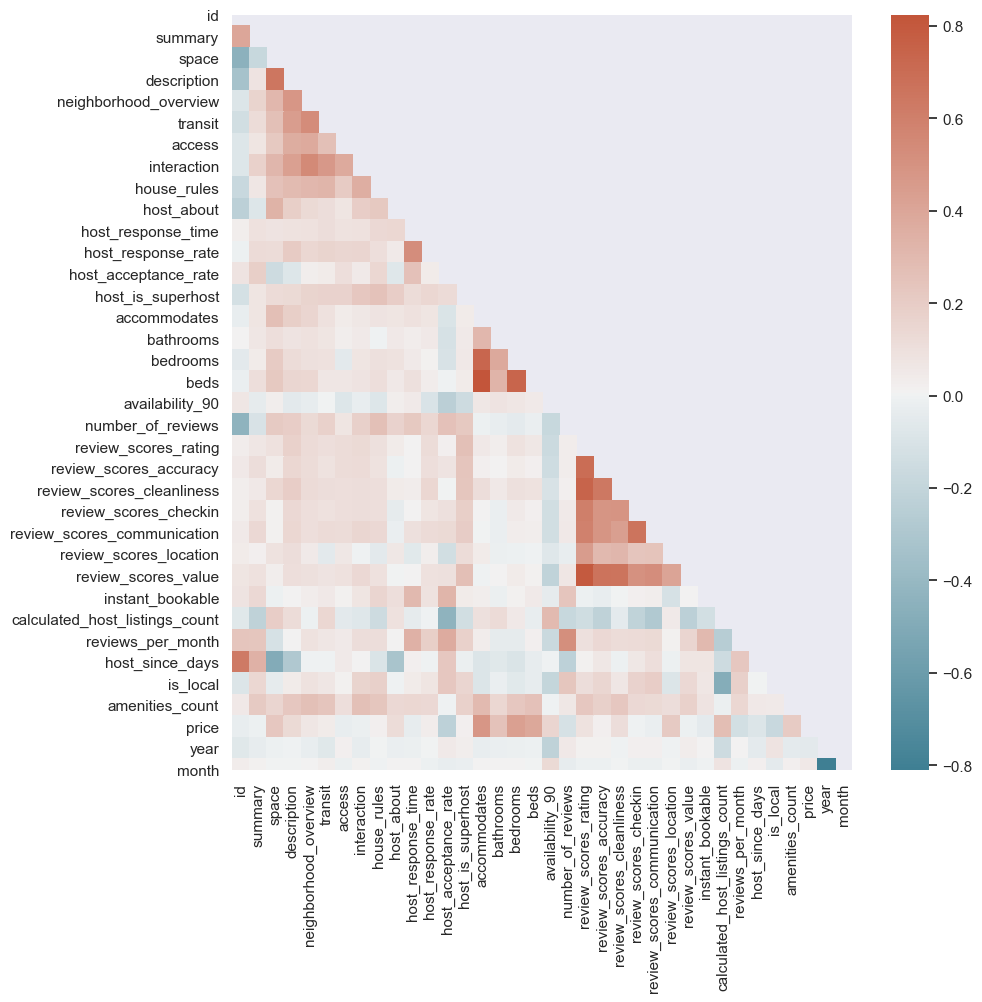

In [14]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap);

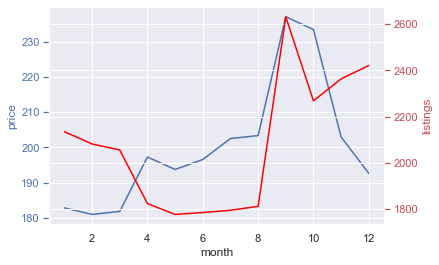

In [15]:
def count_uniques(series):
    return len(series.unique())

month_agg = df.groupby('month').agg(
    {'price': np.mean,
     'id': count_uniques}
)

month_agg = month_agg.rename({'id': 'listings'}, axis=1)

fig, ax = plt.subplots()
sns.lineplot(x='month', y='price', data=month_agg, ci=False, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='month', y='listings', data=month_agg, ci=False, ax=ax2, color='red');
ax.yaxis.label.set_color('#4C72B0')
ax.tick_params(axis='y', colors='#4C72B0')
ax2.yaxis.label.set_color('#C44E52')
ax2.tick_params(axis='y', colors='#C44E52')

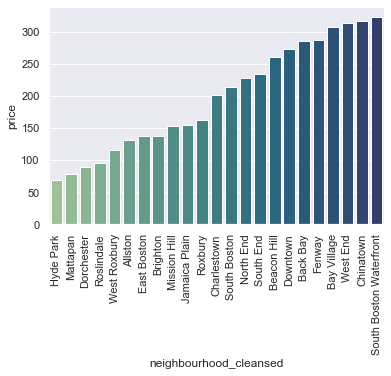

In [16]:
neighbourhoods = df.groupby('neighbourhood_cleansed').agg(
    {
        'price': np.mean,
        'id': count_uniques,
    }
).reset_index()

neighbourhoods = neighbourhoods[neighbourhoods['id']>10].sort_values('price')

sns.barplot(
    x='neighbourhood_cleansed', y='price',
    data=neighbourhoods.sort_values('price'),
    palette='crest'
)
plt.xticks(rotation=90);

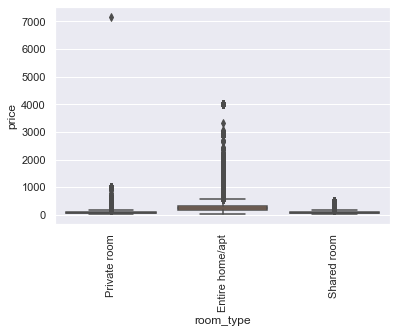

In [17]:
sns.boxplot(y='price', x='room_type', data=df)
plt.xticks(rotation=90);

In [73]:
listings.head()

,id,summary,space,description,neighborhood_overview,transit,access,interaction,house_rules,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,availability_90,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month,host_since_days,is_local,amenities_count
0,12147973,249,481,1000,397,267,80,0,84,180,0,NaN,NaN,0,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,250.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,moderate,1,NaN,2346,1,15
1,3075044,247,73,1000,355,538,132,172,403,77,4,100.0,100.0,0,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,65.0,84,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,moderate,1,1.30,1304,1,21
2,6976,244,1000,1000,953,1000,709,602,374,1075,3,100.0,88.0,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,65.0,61,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0,moderate,1,0.47,181,1,18
3,1436513,493,631,1000,1000,250,969,556,591,1293,3,100.0,50.0,0,Roslindale,House,Private room,4,1.0,1.0,2.0,75.0,26,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,1,1.00,1622,1,23
4,7651065,245,248,1000,720,1000,105,467,160,557,4,100.0,100.0,1,Roslindale,House,Private room,2,1.5,1.0,2.0,79.0,59,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,0,flexible,1,2.25,2007,1,14


## Model Fitting 

### Preprocessing 

As a final bit of preprocessing, we'll impute missing values, encode categorical features and drop the `id` column.

The missing values we have are almost all related to reviews with features such as `host_response_rate` not being available if the host has not had any reviews. We'll impute these missing values with a 0.

In [171]:
# Columns to impute with a 0
impute_with_0 = [
    'host_response_rate', 'host_acceptance_rate', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value', 'reviews_per_month'
]

for column in impute_with_0:
    df[column] = df[column].fillna(0)

For the final few columns that contain null values, we will drop the 0.5% of rows that contain nulls.

In [172]:
_ = df.shape[0]
df = df.dropna()
print(f'{_ - df.shape[0]} rows dropped of {_}')

8523 rows dropped of 643037


Finally we create dummies and drop the id and year columns.

In [173]:
df = pd.get_dummies(df)
df = df.drop(['id', 'year'], axis=1)

We'll also remove some of the more extreme outliers from our dataset as this will impact our regression analysis.

In [174]:
with_outliers = df
without_outliers = df[df.price<600]

## Fitting the model

### With outliers

In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('price', axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = (mean_squared_error(y_train, y_pred_train))**0.5
rmse_test = (mean_squared_error(y_test, y_pred_test))**0.5

print(
    'Train R-squared: {:.3f}\
    \nTest R-squared: {:.3f}\
    \nTrain RMSE: ${:.2f}\
    \nTest RMSE: ${:.2f}'
    .format(r2_train, r2_test, rmse_train, rmse_test)
)

Train R-squared: 0.452    
Test R-squared: 0.437    
Train RMSE: $133.17    
Test RMSE: $137.47


### Feature importance 

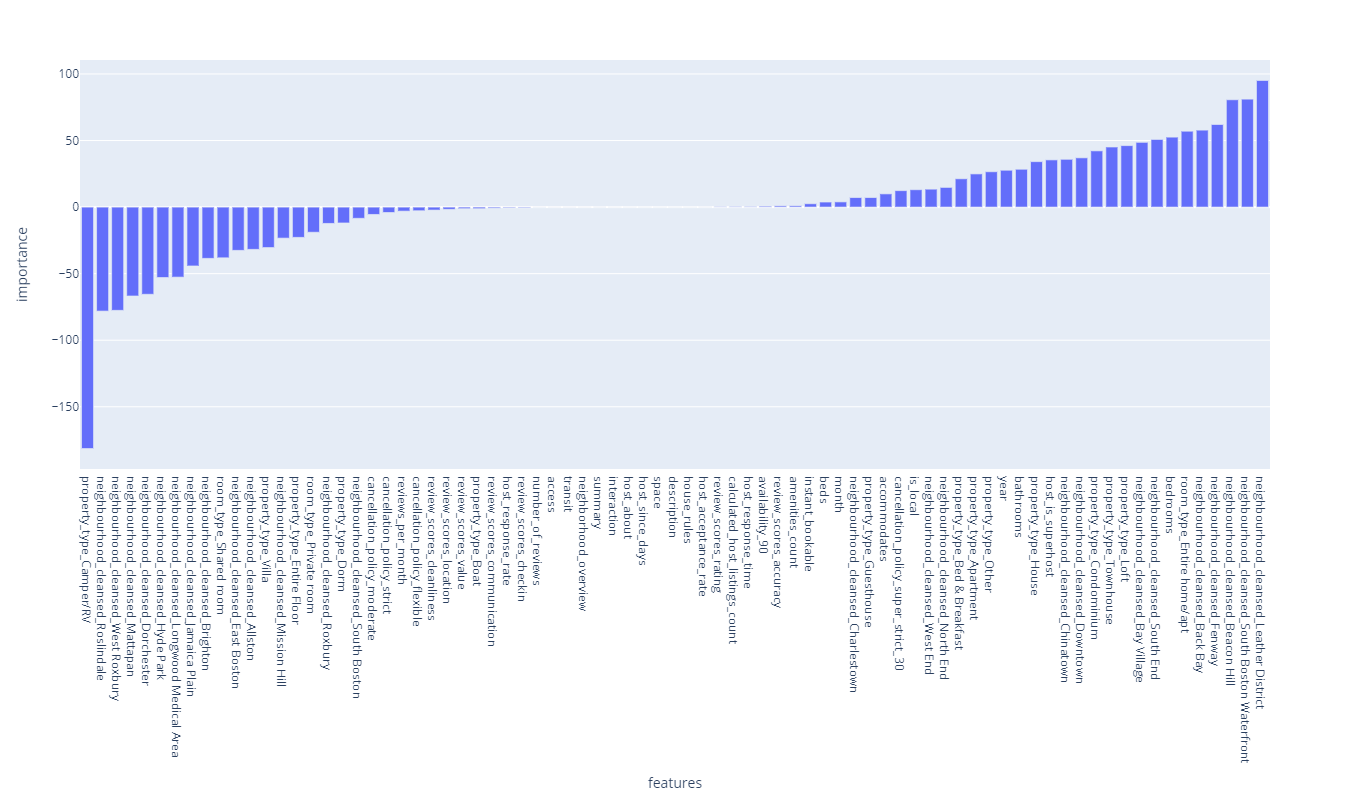

In [83]:
coefs = lr.coef_

feature_importance = pd.DataFrame(
    {'features': X.columns, 'coefficients': lr.coef_}
).sort_values(by='coefficients')

# fig, ax = plt.subplots(figsize=(15, 10))
# sns.barplot(x='features', y='coefficients', data=feature_importance)
# plt.xticks(rotation=90)
# plt.show()

import plotly.express as px
fig = px.bar(x='features', y='coefficients', data_frame=feature_importance, height=800)
fig.show()

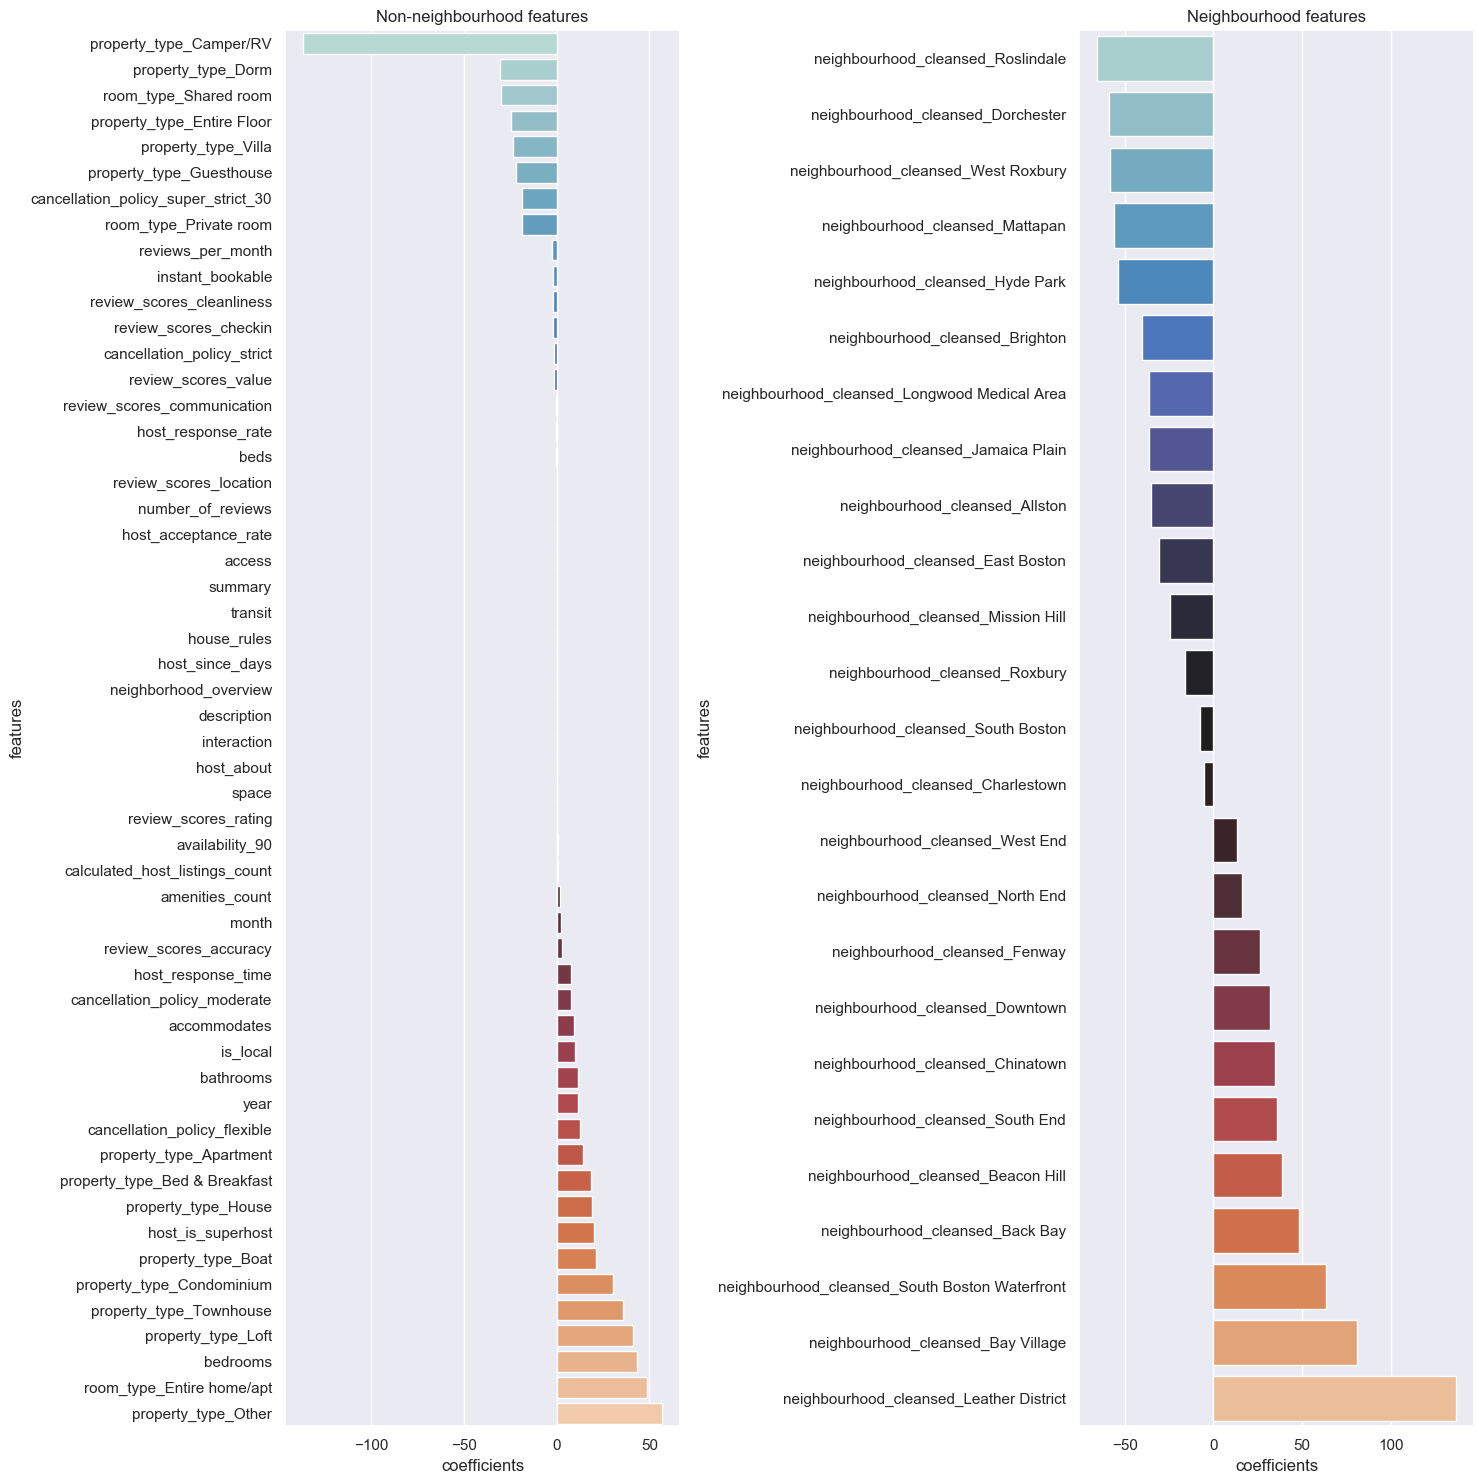

In [149]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15), dpi=100)

non_neighbourhood = feature_importance[~feature_importance.features.str.contains('neighbourhood_cleansed')]
sns.barplot(y='features', x='coefficients', data=non_neighbourhood, orient='h', ax=ax0, palette='icefire')
ax0.set_title('Non-neighbourhood features')

neighbourhood_only = feature_importance[feature_importance.features.str.contains('neighbourhood_cleansed')]
sns.barplot(y='features', x='coefficients', orient='h', data=neighbourhood_only, ax=ax1, palette='icefire')
ax1.set_title('Neighbourhood features')

fig.tight_layout()
plt.show();

### Without outliers 

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = without_outliers.drop('price', axis=1)
y = without_outliers.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = (mean_squared_error(y_train, y_pred_train))**0.5
rmse_test = (mean_squared_error(y_test, y_pred_test))**0.5

print(
    'Train R-squared: {:.3f}\
    \nTest R-squared: {:.3f}\
    \nTrain RMSE: ${:.2f}\
    \nTest RMSE: ${:.2f}'
    .format(r2_train, r2_test, rmse_train, rmse_test)
)

Train R-squared: 0.723    
Test R-squared: 0.722    
Train RMSE: $63.05    
Test RMSE: $62.97


### Testing for normality

Based on the histogram, the QQ plot, the plot of residuals against fitted values and the Kolmogorov-Smirnoff goodness-of-fit test, the residuals do not follow a normal distribution. However, due to the CLT and since we have a suitably large dataset, non-normality of residuals should not impact the model.

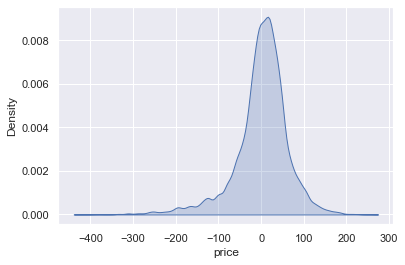

In [87]:
sns.kdeplot(residuals, shade=True)

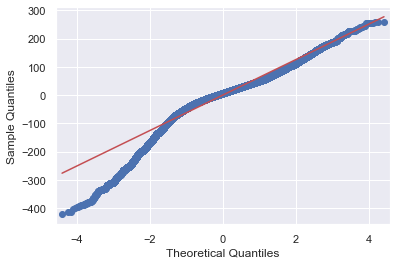

In [88]:
from statsmodels.graphics.gofplots import qqplot

residuals = y_pred_test - y_test
qqplot(residuals, line='s');

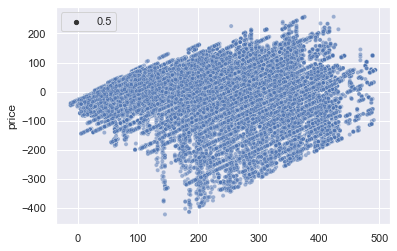

In [91]:
sns.scatterplot(x=y_pred_test, y=residuals, size=0.5, alpha=0.5);

In [90]:
from scipy.stats import kstest

kstest(residuals, 'norm')

KstestResult(statistic=0.5326238639667185, pvalue=0.0)

### Feature importance 

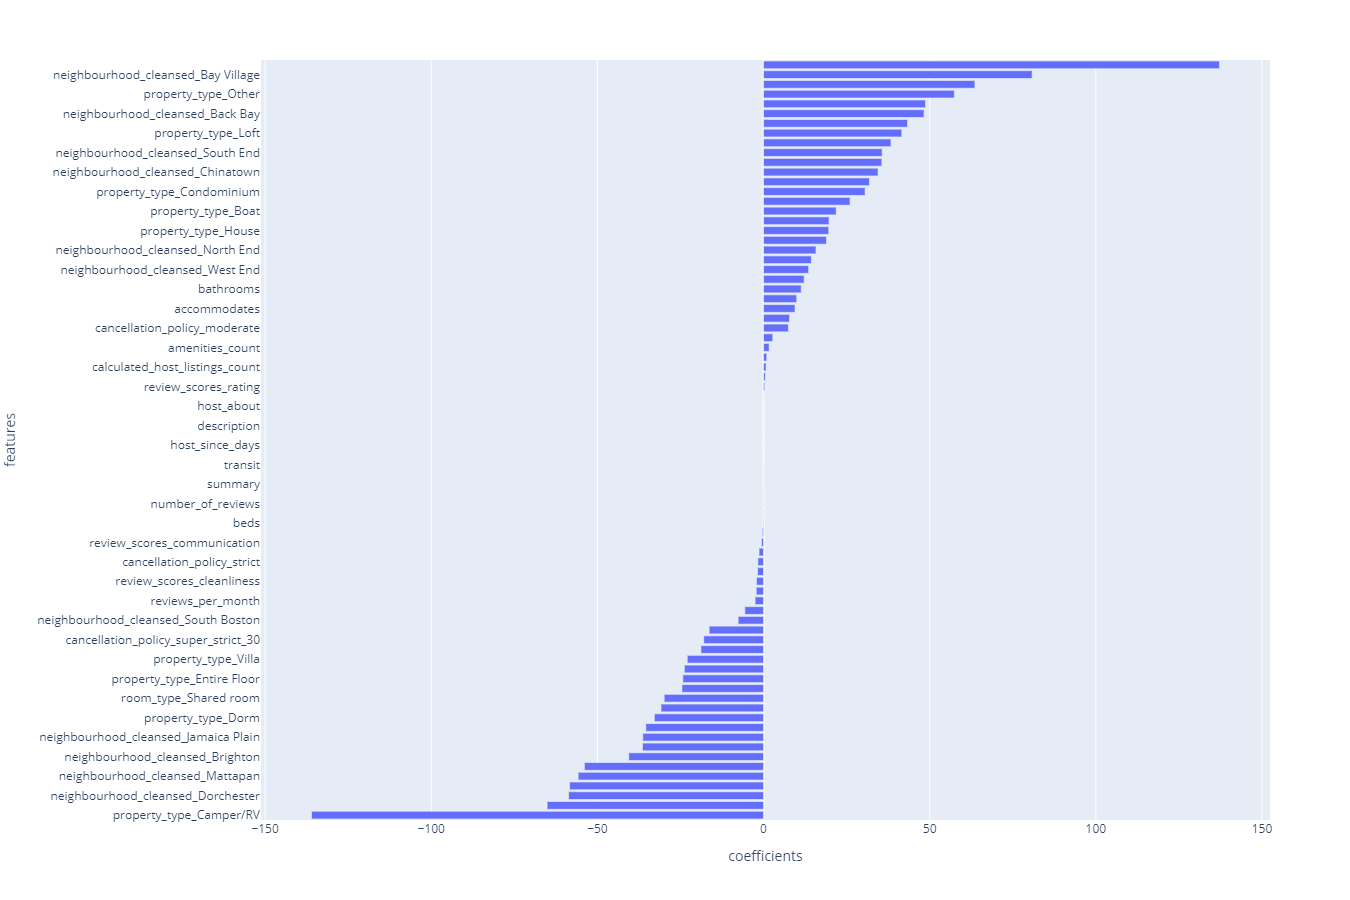

In [176]:
feature_importance = pd.DataFrame(
    {'features': X.columns, 'coefficients': lr.coef_}
).sort_values(by='coefficients')

# fig, ax = plt.subplots(figsize=(15, 10))
# sns.barplot(x='features', y='coefficients', data=feature_importance)
# plt.xticks(rotation=90)
# plt.show()

import plotly.express as px
fig = px.bar(y='features', x='coefficients', data_frame=feature_importance, height=900, orientation='h')
fig.show()

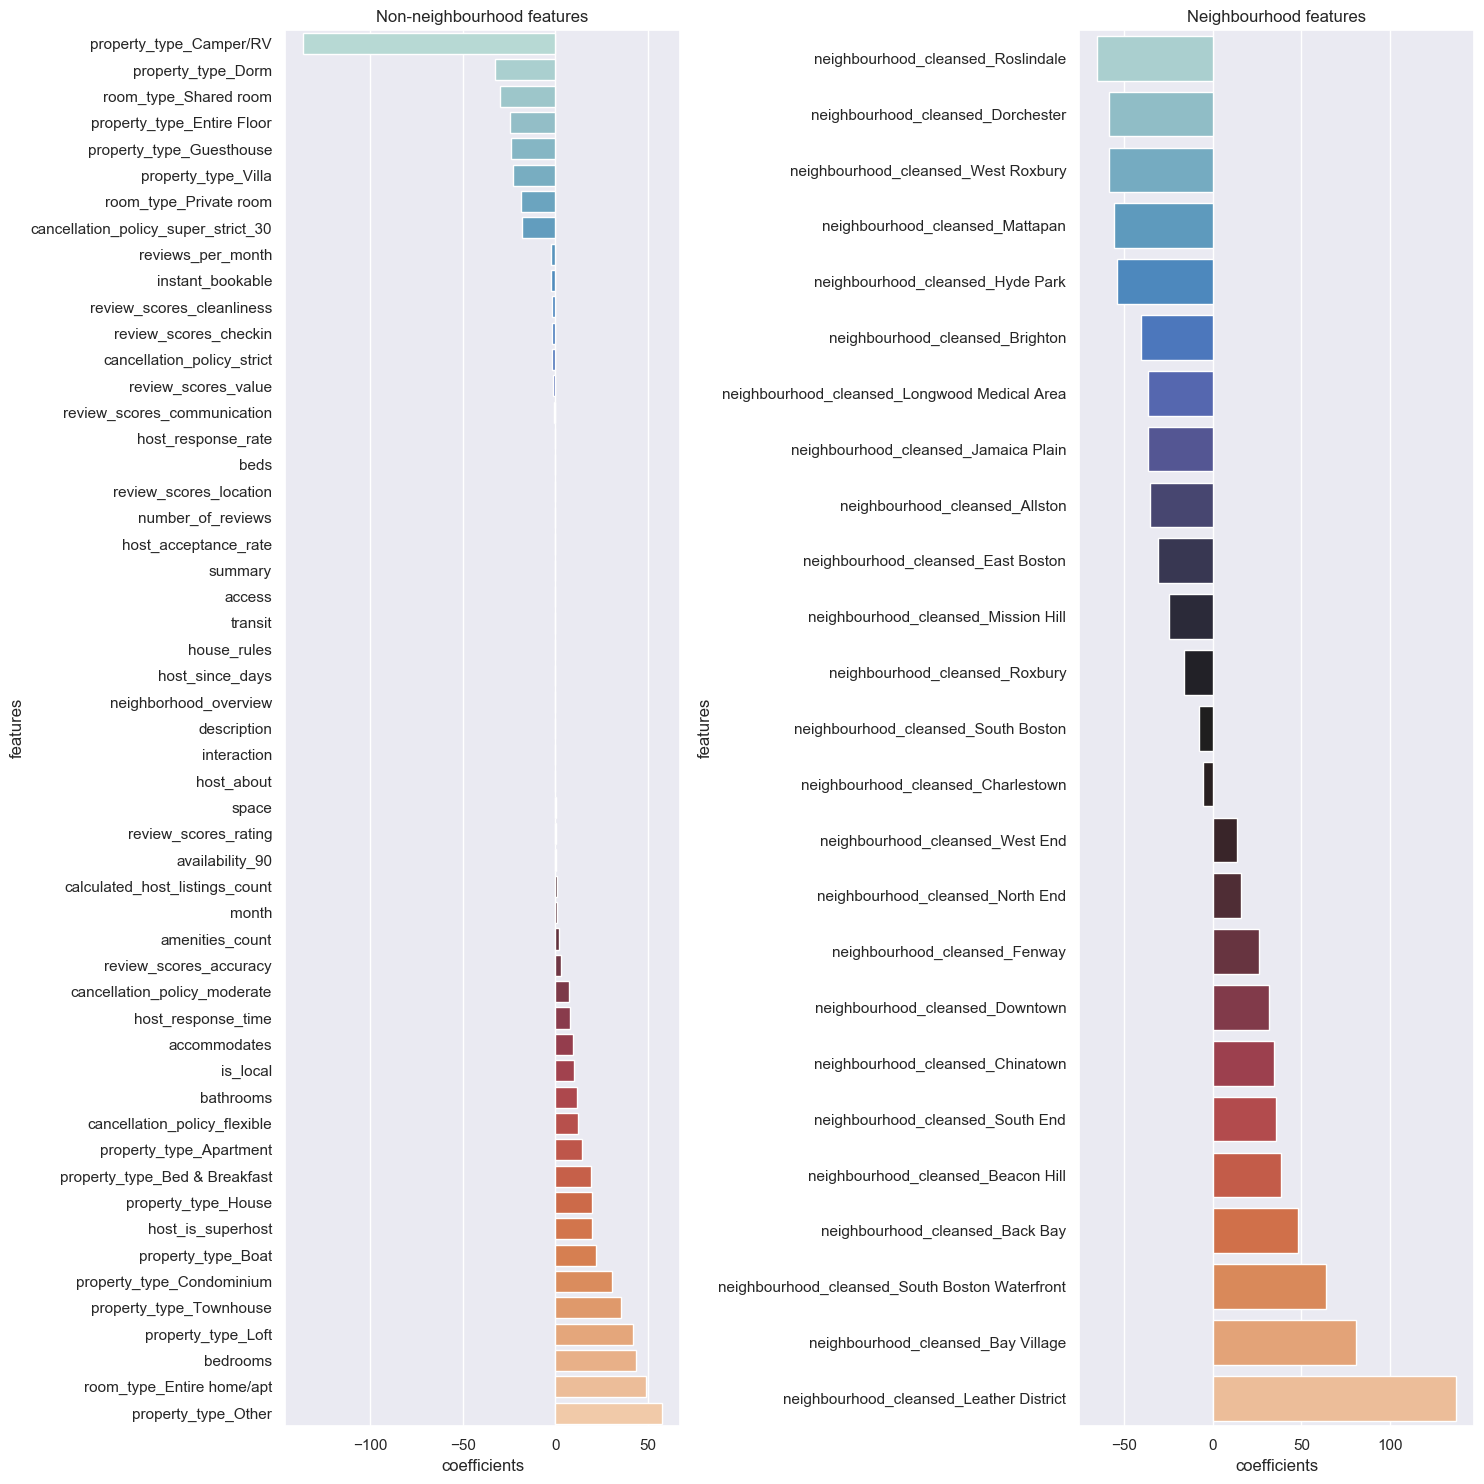

In [177]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15), dpi=100)

non_neighbourhood = feature_importance[~feature_importance.features.str.contains('neighbourhood_cleansed')]
sns.barplot(y='features', x='coefficients', data=non_neighbourhood, orient='h', ax=ax0, palette='icefire')
ax0.set_title('Non-neighbourhood features')

neighbourhood_only = feature_importance[feature_importance.features.str.contains('neighbourhood_cleansed')]
sns.barplot(y='features', x='coefficients', orient='h', data=neighbourhood_only, ax=ax1, palette='icefire')
ax1.set_title('Neighbourhood features')

fig.tight_layout()
plt.show();

### Elastic Net

With so many features, it's sensible to use regularisation. The options for Linear Regression are Ridge, Lasso or Elastic Net regularisation. Ridge Regression generally acts as a good default, but Lasso or Elastic Net will work better for us since we expect many of the features to not be useful. We prefer Elastic Net in this instance since some of the features show signs of correlation.

In [160]:
# Without scaling
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.25)
elastic_net.fit(X_train, y_train)

y_pred_train = elastic_net.predict(X_train)
y_pred_test = elastic_net.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = (mean_squared_error(y_train, y_pred_train))**0.5
rmse_test = (mean_squared_error(y_test, y_pred_test))**0.5

print(
    'Without scaling\
    \nTrain R-squared: {:.3f}\
    \nTest R-squared: {:.3f}\
    \nTrain RMSE: ${:.2f}\
    \nTest RMSE: ${:.2f}'
    .format(r2_train, r2_test, rmse_train, rmse_test)
)

Without scaling    
Train R-squared: 0.681    
Test R-squared: 0.680    
Train RMSE: $67.62    
Test RMSE: $67.55


In [161]:
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.25)

pipeline = make_pipeline(StandardScaler(), elastic_net)
pipeline.fit(X_train, y_train)
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = (mean_squared_error(y_train, y_pred_train))**0.5
rmse_test = (mean_squared_error(y_test, y_pred_test))**0.5

print(
    'With scaling\
    \nTrain R-squared: {:.3f}\
    \nTest R-squared: {:.3f}\
    \nTrain RMSE: ${:.2f}\
    \nTest RMSE: ${:.2f}'
    .format(r2_train, r2_test, rmse_train, rmse_test)
)

With scaling    
Train R-squared: 0.721    
Test R-squared: 0.720    
Train RMSE: $63.29    
Test RMSE: $63.21


In [162]:
# Comparing the two scaling methods
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

for scaler in [StandardScaler(), MaxAbsScaler()]:
    elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.25)

    pipeline = make_pipeline(scaler, elastic_net)
    pipeline.fit(X_train, y_train)
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    rmse_train = (mean_squared_error(y_train, y_pred_train))**0.5
    rmse_test = (mean_squared_error(y_test, y_pred_test))**0.5

    print(
        'Train R-squared: {:.3f}\
        \nTest R-squared: {:.3f}\
        \nTrain RMSE: ${:.2f}\
        \nTest RMSE: ${:.2f}'
        .format(r2_train, r2_test, rmse_train, rmse_test)
    )

Train R-squared: 0.721        
Test R-squared: 0.720        
Train RMSE: $63.29        
Test RMSE: $63.21
Train R-squared: 0.602        
Test R-squared: 0.601        
Train RMSE: $75.53        
Test RMSE: $75.44


# Question: why does the MaxAbsScaler provide such a worse score?

In [29]:
# # Takes forever to run
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#     'alpha': [0.01, 0.1, 1],
#     'l1_ratio': [0.25, 0.5, 0.75]
# }

# elastic_net = ElasticNet()
# elastic_net_cv = RandomizedSearchCV(elastic_net, param_grid, cv=2)
# elastic_net_cv.fit(X, y)

# print(elastic_net_cv.best_params_, elastic_net_cv.best_score_)

In [163]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scale, y_train)
y_pred = elastic_net.predict(X_test_scale)

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred)**0.5)

0.7208430964952127
63.09209315796956


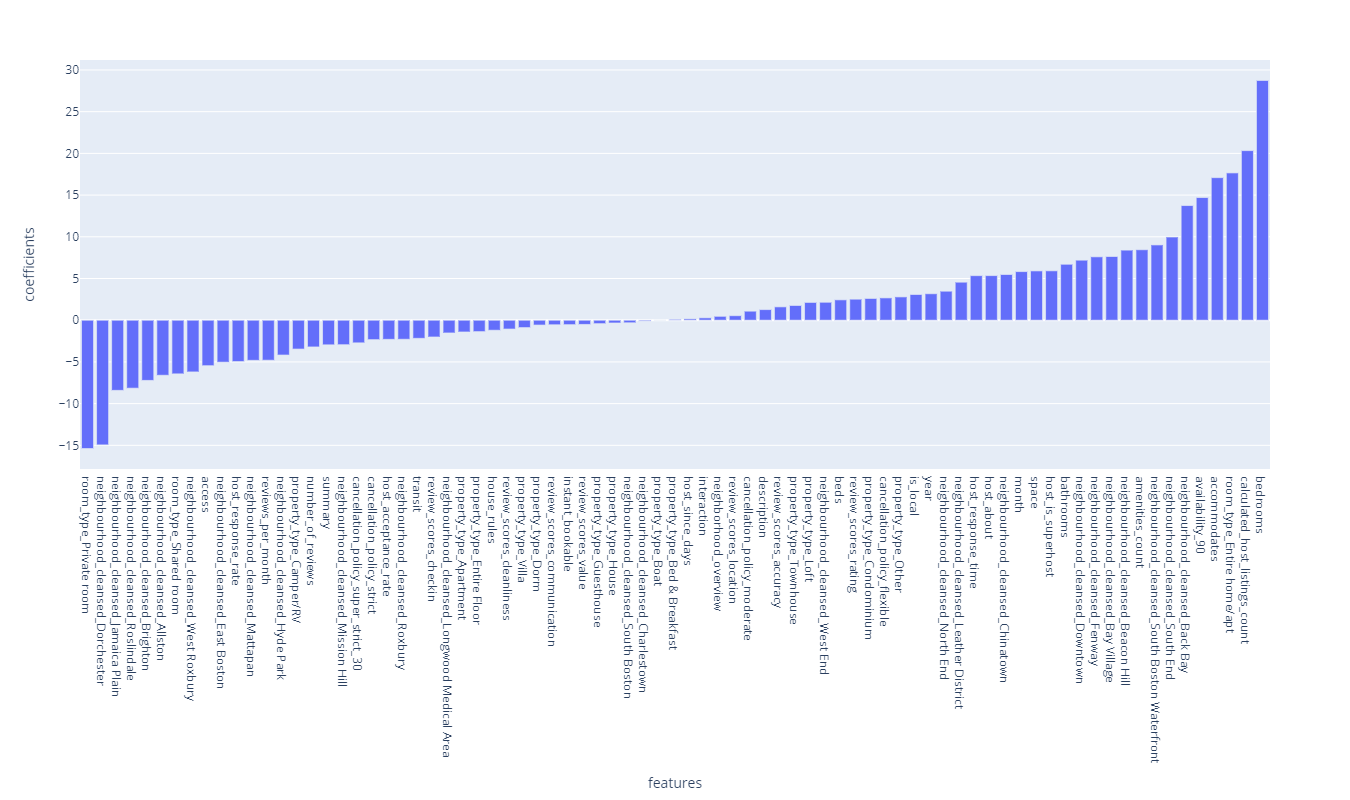

In [164]:
feature_importance = pd.DataFrame(
    {'features': X.columns, 'coefficients': elastic_net.coef_}
).sort_values(by='coefficients')

# fig, ax = plt.subplots(figsize=(15, 10))
# sns.barplot(x='features', y='coefficients', data=feature_importance)
# plt.xticks(rotation=90)
# plt.show()

import plotly.express as px
fig = px.bar(x='features', y='coefficients', data_frame=feature_importance, height=800)
fig.show()

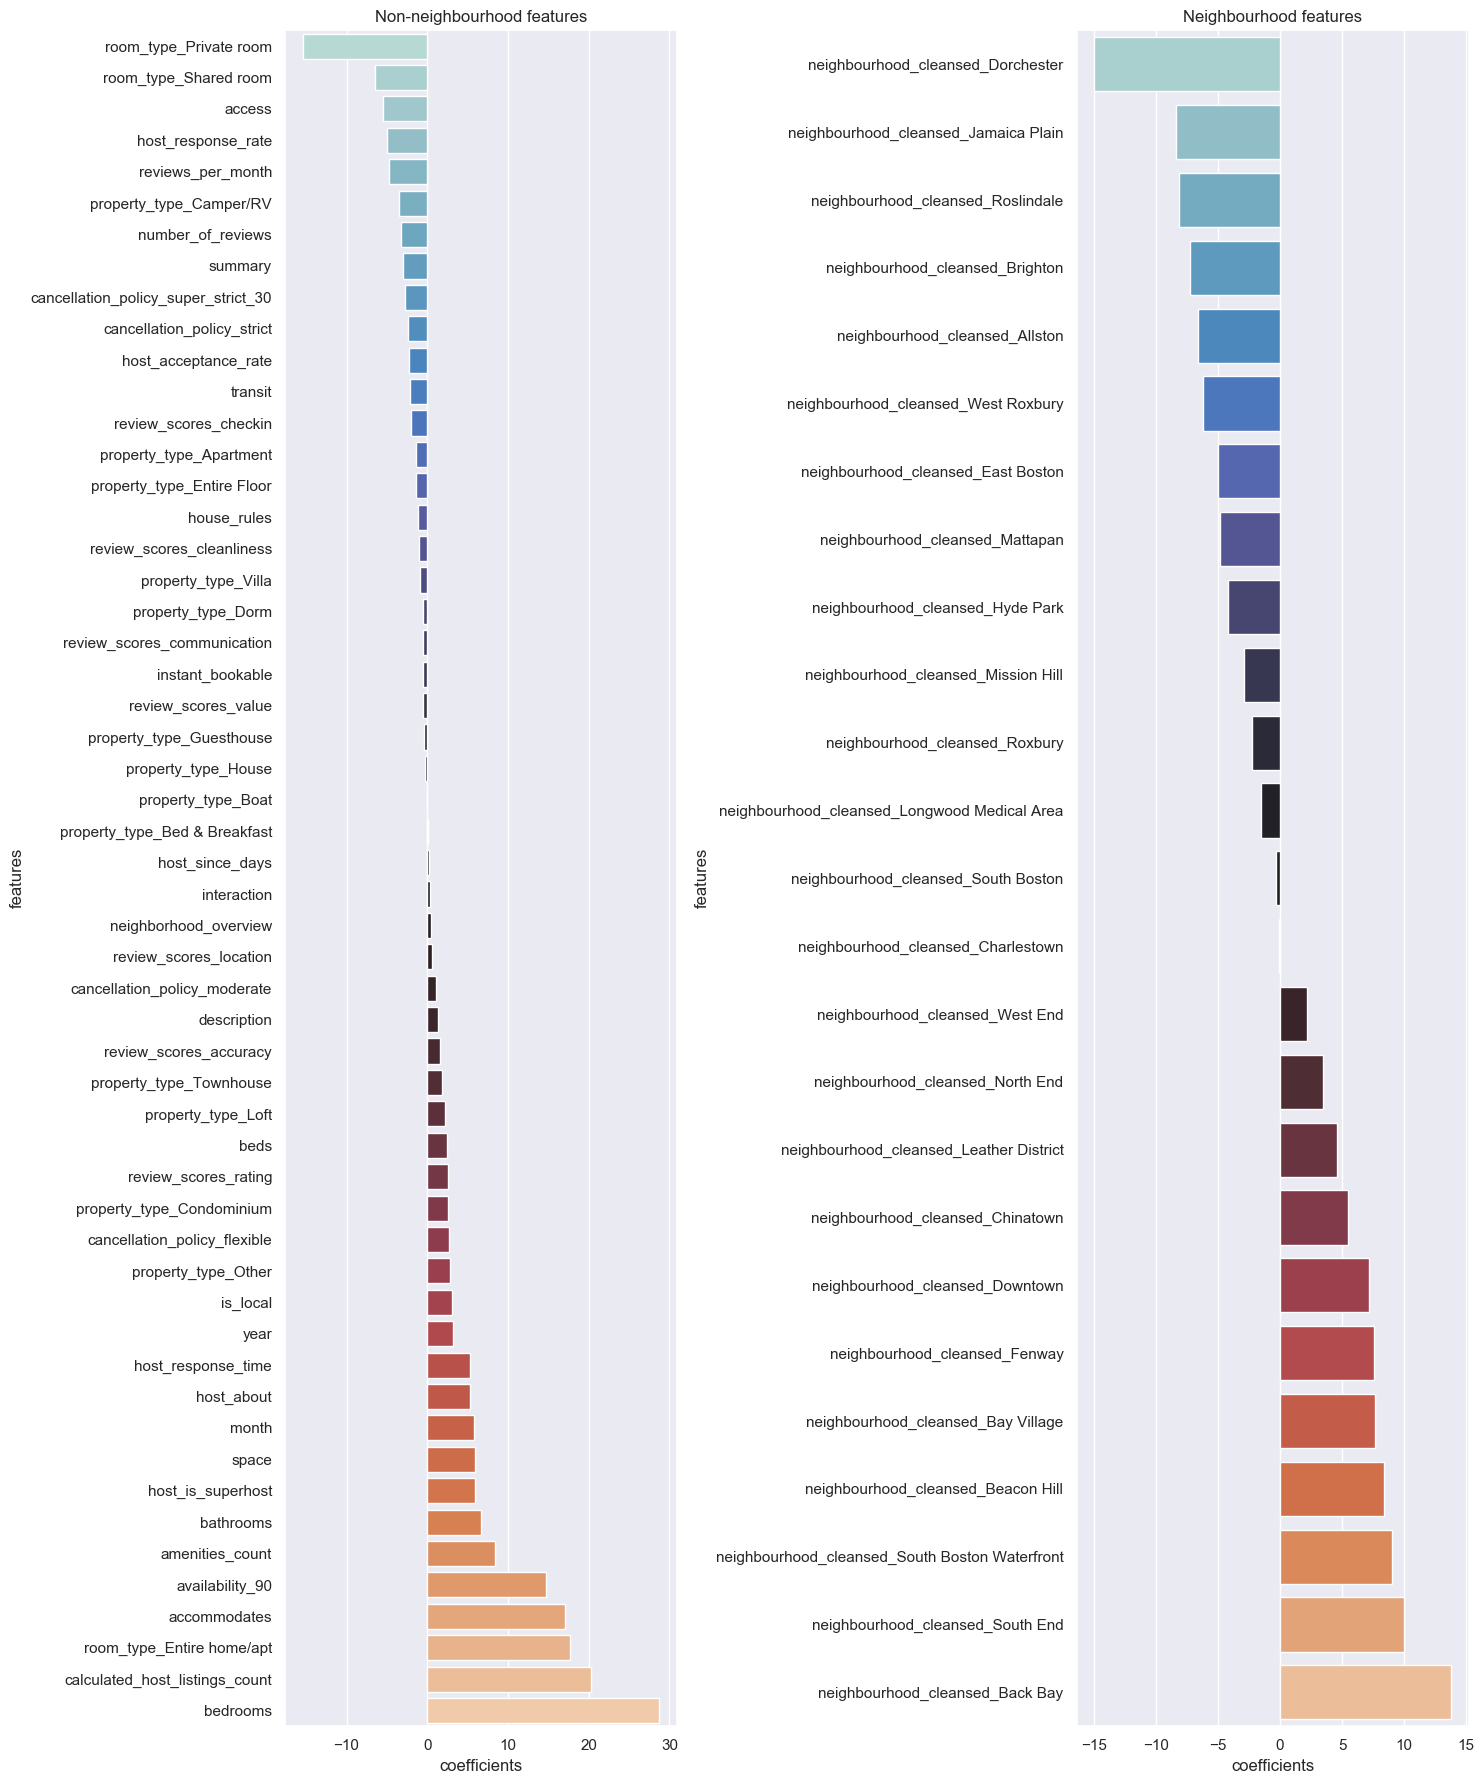

In [165]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 18), dpi=100)

non_neighbourhood = feature_importance[~feature_importance.features.str.contains('neighbourhood_cleansed')]
sns.barplot(y='features', x='coefficients', data=non_neighbourhood, orient='h', ax=ax0, palette='icefire')
ax0.set_title('Non-neighbourhood features')

neighbourhood_only = feature_importance[feature_importance.features.str.contains('neighbourhood_cleansed')]
sns.barplot(y='features', x='coefficients', orient='h', data=neighbourhood_only, ax=ax1, palette='icefire')
ax1.set_title('Neighbourhood features')

fig.tight_layout()
plt.show();

# Scratchpad

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler

pipeline = make_pipeline(StandardScaler(), LinearRegression())

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

r2_score(y_test, y_pred)

0.7225150433055243

In [32]:
def fit_and_score(model):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    rmse_train = (mean_squared_error(y_train, y_pred_train))**0.5
    rmse_test = (mean_squared_error(y_test, y_pred_test))**0.5
    
    return [r2_train, r2_test, rmse_train, rmse_test]

In [33]:
results = fit_and_score(LinearRegression())
print(results)

[0.723276361806733, 0.7225150433055236, 62.9826463932545, 62.9028715331502]


## Random Forests

Train R-squared: 0.956    
Test R-squared: 0.958    
Train RMSE: $37.57    
Test RMSE: $37.72


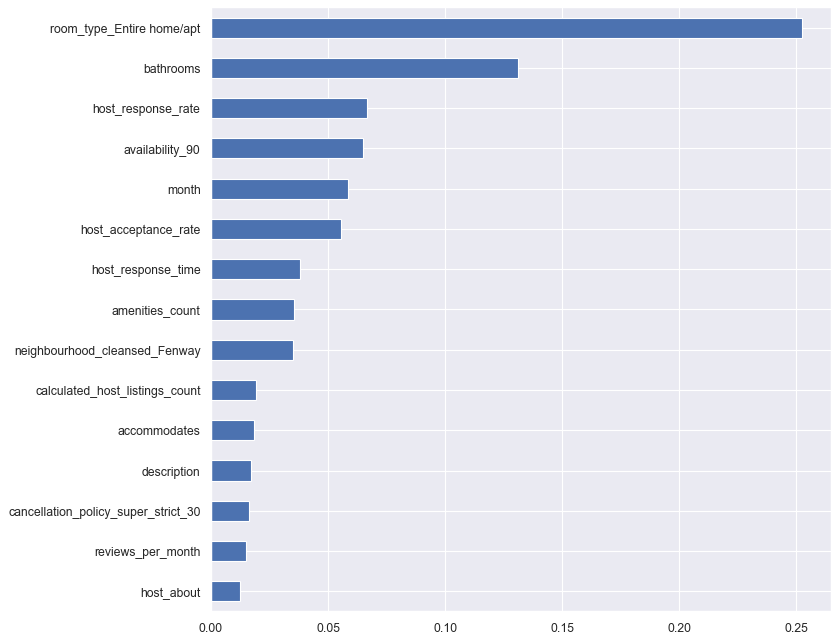

In [220]:
from sklearn.ensemble import RandomForestRegressor

X = with_outliers.drop('price', axis=1)
y = with_outliers.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = (mean_squared_error(y_train, y_pred_train))**0.5
rmse_test = (mean_squared_error(y_test, y_pred_test))**0.5

print(
    'Train R-squared: {:.3f}\
    \nTest R-squared: {:.3f}\
    \nTrain RMSE: ${:.2f}\
    \nTest RMSE: ${:.2f}'
    .format(r2_train, r2_test, rmse_train, rmse_test)
)

fig, ax = plt.subplots(figsize=(10, 10), dpi=80)
importances_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values().tail(15)
importances_rf.plot(kind='barh');

Train R-squared: 0.956    
Test R-squared: 0.958    
Train RMSE: $37.56    
Test RMSE: $37.65


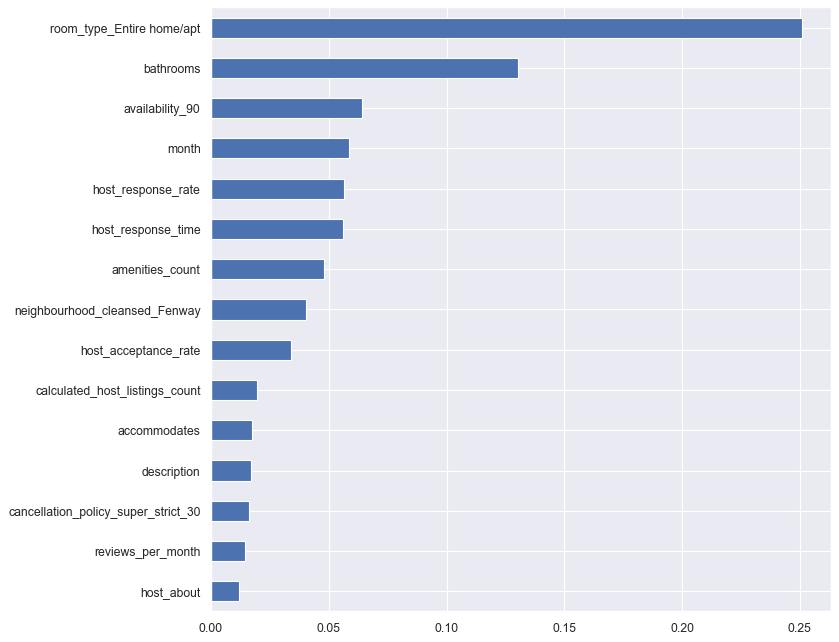

In [230]:
# With scaling
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

X = with_outliers.drop('price', axis=1)
y = with_outliers.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train_scale, y_train)

y_pred_train = rf.predict(X_train_scale)
y_pred_test = rf.predict(X_test_scale)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = (mean_squared_error(y_train, y_pred_train))**0.5
rmse_test = (mean_squared_error(y_test, y_pred_test))**0.5

print(
    'Train R-squared: {:.3f}\
    \nTest R-squared: {:.3f}\
    \nTrain RMSE: ${:.2f}\
    \nTest RMSE: ${:.2f}'
    .format(r2_train, r2_test, rmse_train, rmse_test)
)

fig, ax = plt.subplots(figsize=(10, 10), dpi=80)
importances_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values().tail(15)
importances_rf.plot(kind='barh');

Train R-squared: 0.976    
Test R-squared: 0.973    
Train RMSE: $18.58    
Test RMSE: $19.59


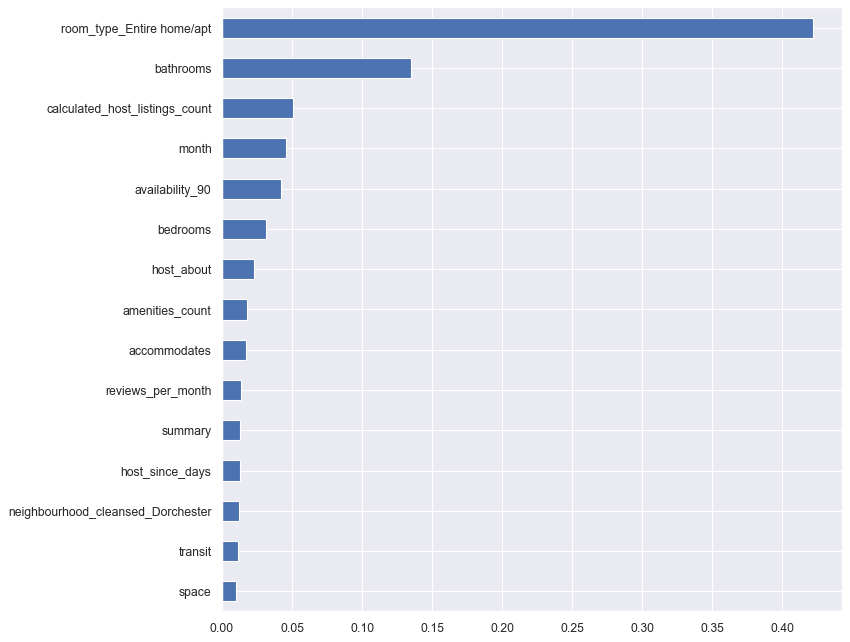

In [221]:
from sklearn.ensemble import RandomForestRegressor

X = without_outliers.drop('price', axis=1)
y = without_outliers.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = (mean_squared_error(y_train, y_pred_train))**0.5
rmse_test = (mean_squared_error(y_test, y_pred_test))**0.5

print(
    'Train R-squared: {:.3f}\
    \nTest R-squared: {:.3f}\
    \nTrain RMSE: ${:.2f}\
    \nTest RMSE: ${:.2f}'
    .format(r2_train, r2_test, rmse_train, rmse_test)
)

fig, ax = plt.subplots(figsize=(10, 10), dpi=80)
importances_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values().tail(15)
importances_rf.plot(kind='barh');

Train R-squared: 0.976    
Test R-squared: 0.551    
Train RMSE: $18.57    
Test RMSE: $122.72


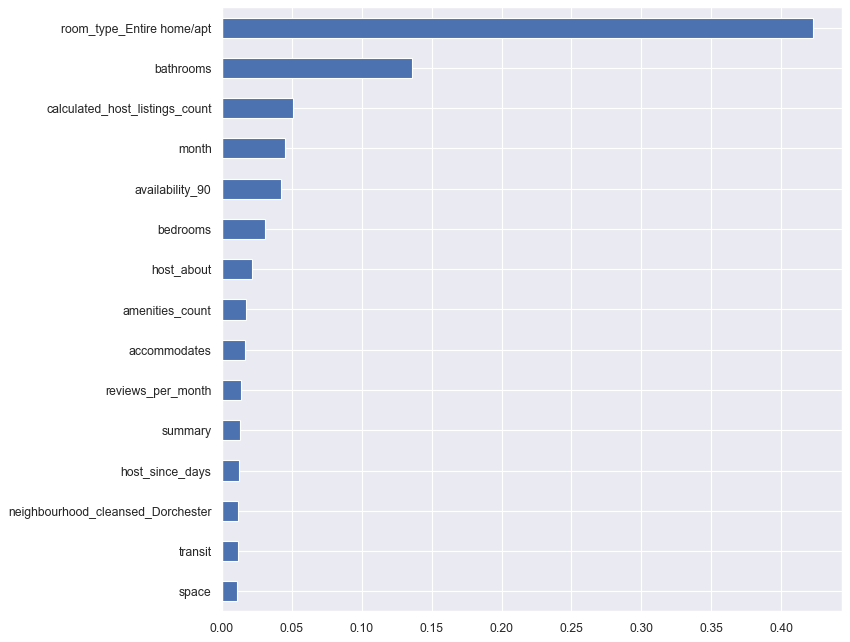

In [228]:
# Dropping outliers after the train-test-split
from sklearn.ensemble import RandomForestRegressor

X = df.drop('price', axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = X_train[y_train<600]
y_train = y_train[y_train<600]

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = (mean_squared_error(y_train, y_pred_train))**0.5
rmse_test = (mean_squared_error(y_test, y_pred_test))**0.5

print(
    'Train R-squared: {:.3f}\
    \nTest R-squared: {:.3f}\
    \nTrain RMSE: ${:.2f}\
    \nTest RMSE: ${:.2f}'
    .format(r2_train, r2_test, rmse_train, rmse_test)
)

fig, ax = plt.subplots(figsize=(10, 10), dpi=80)
importances_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values().tail(15)
importances_rf.plot(kind='barh');

## XGBoost

In [218]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = (mean_squared_error(y_train, y_pred_train))**0.5
rmse_test = (mean_squared_error(y_test, y_pred_test))**0.5

print(
    'Train R-squared: {:.3f}\
    \nTest R-squared: {:.3f}\
    \nTrain RMSE: ${:.2f}\
    \nTest RMSE: ${:.2f}'
    .format(r2_train, r2_test, rmse_train, rmse_test)
)

Train R-squared: 0.935    
Test R-squared: 0.940    
Train RMSE: $45.81    
Test RMSE: $44.92


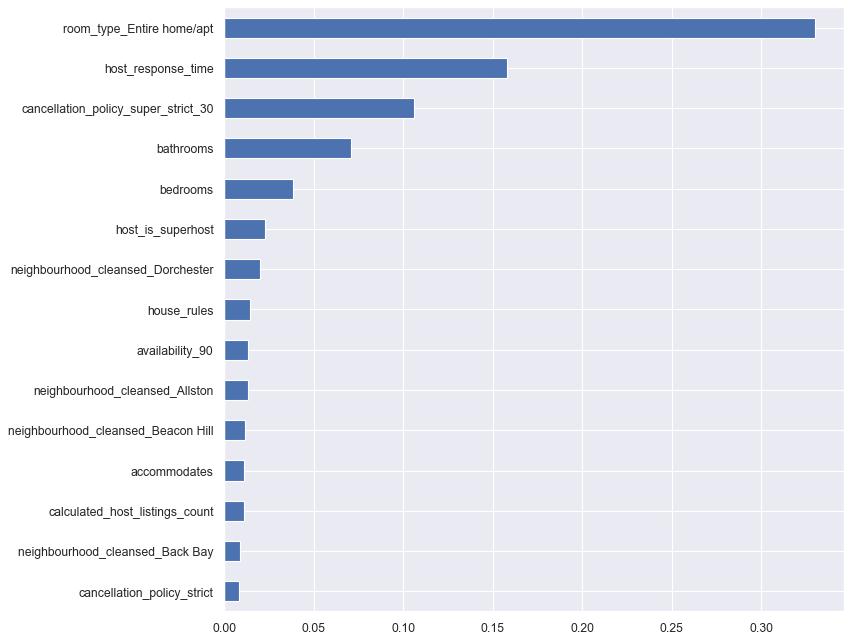

In [219]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=80)
importances_xgb = pd.Series(xgb.feature_importances_, index=X.columns).sort_values().sort_values().tail(15)
importances_xgb.plot(kind='barh');

## Adaboost

### Why has Adaboost produced such a terrible score here?

Because you have set the `max_depth` to equal 1. This would be fine for a classification task, however for a regression task, the default max_depth is 3. Changing this brings the scores much more in line.

In [180]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=1)
adb = AdaBoostRegressor(base_estimator=dt, n_estimators=100)
adb.fit(X_train, y_train)

y_pred_train = adb.predict(X_train)
y_pred_test = adb.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = (mean_squared_error(y_train, y_pred_train))**0.5
rmse_test = (mean_squared_error(y_test, y_pred_test))**0.5

print(
    'Train R-squared: {:.3f}\
    \nTest R-squared: {:.3f}\
    \nTrain RMSE: ${:.2f}\
    \nTest RMSE: ${:.2f}'
    .format(r2_train, r2_test, rmse_train, rmse_test)
)

Train R-squared: 0.383    
Test R-squared: 0.379    
Train RMSE: $94.07    
Test RMSE: $94.09


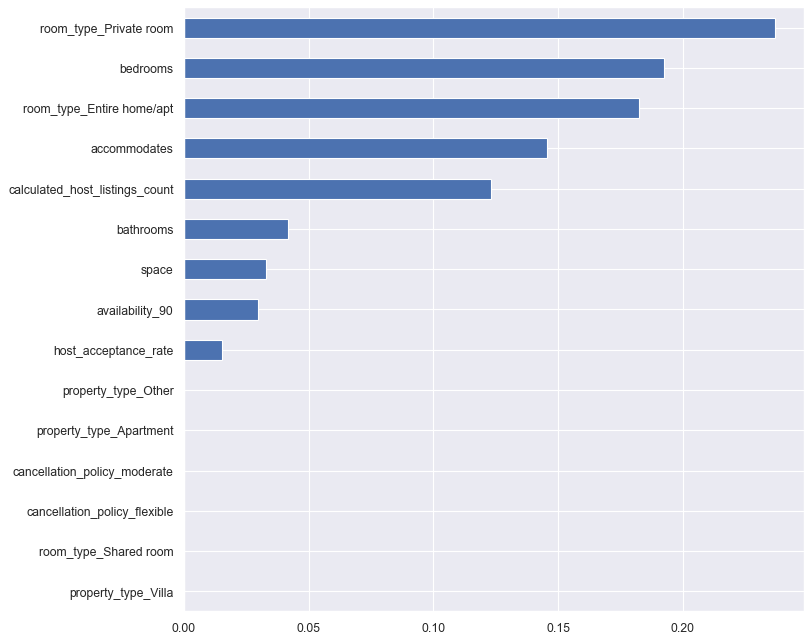

In [214]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=80)
importances_adb = pd.Series(adb.feature_importances_, index=X.columns).sort_values().sort_values().tail(15)
importances_adb.plot(kind='barh');